## Time-series Analysis & Stationarity Check

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from IPython.display import display
import math

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)


#### Data preparation

In [5]:
df = pd.read_excel("Данные-рус Обработанные.xlsx")
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
3,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
4,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88


In [6]:
# remove first two rows (blank)
df = df.drop(index=df.index[:2]).reset_index(drop=True)
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
2,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88
3,КРС,Сельхозпредприятия,АКТЮБИНСКАЯ ОБЛАСТЬ,554.41,504.35,493.56,445.51,585.79,316.47,469.49,...,1520.51,1747.09,915.8,1851.96,932.63,945.11,1142.92,1637.64,1180.54,1045.69
4,КРС,Сельхозпредприятия,АЛМАТИНСКАЯ ОБЛАСТЬ,178.3,362.86,352.49,451.79,228.32,708.84,280.55,...,1055.43,110.45,188.15,172.63,112.31,134.99,1212.02,260.02,129.38,159.66


In [7]:
# Set the first row as column labels
df.columns = df.iloc[0]  # Assign first row as header
df = df[1:].reset_index(drop=True)  # Drop the first row and reset index
df.sample(5)


,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
235,Лошади,Крестьянские или фермерские хозяйства,ГАСТАНА,0,0.39,0.78,0.39,0.39,0.39,0.39,...,0,0,0,0,0,0,0,0,0,0
115,Овцы и козы,Хозяйства населения,ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ,294.81,297.34,612.57,1015.1,942.43,1306.11,769.78,...,637.6,769.4,806.8,1144.7,691.1,955.3,800.8,698.8,839.4,1669.7
520,Яйца,Хозяйства населения,ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ,4250.1,5193.1,8476.2,9801.2,16476.1,13275.2,13275.2,...,3889.2,4720.3,6221.4,7206.2,5819.4,5475.6,5286.5,4241.7,3976.5,4110.7
36,КРС,Крестьянские или фермерские хозяйства,ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ,1312.24,1921.43,2015.33,1816.9,2005.26,3866,2082.77,...,906.11,881.62,1031.53,2900.25,757.69,885.09,1463.97,1245.05,1756.9,4661.59
114,Овцы и козы,Хозяйства населения,АТЫРАУСКАЯ ОБЛАСТЬ,417.3,453.7,877.32,616.29,397.8,1861.57,596.08,...,809.2,529.6,383.3,1978,471.3,642.4,541.1,673,436.6,1043.3


In [8]:
df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', '    АКМОЛИНСКАЯ ОБЛАСТЬ',
       '    АКТЮБИНСКАЯ ОБЛАСТЬ', '    АЛМАТИНСКАЯ ОБЛАСТЬ',
       '    АТЫРАУСКАЯ ОБЛАСТЬ', '    ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ЖАМБЫЛСКАЯ ОБЛАСТЬ', '    КАРАГАНДИНСКАЯ ОБЛАСТЬ',
       '    КОСТАНАЙСКАЯ ОБЛАСТЬ', '    КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ',
       '    МАНГИСТАУСКАЯ ОБЛАСТЬ', '    ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ПАВЛОДАРСКАЯ ОБЛАСТЬ', '    СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ', '    ГАСТАНА', '    ГАЛМАТЫ',
       '    ГШЫМКЕНТ', '    ТУРКЕСТАНСКАЯ ОБЛАСТЬ', '    ОБЛАСТЬ ЖЕТІСУ',
       '    ОБЛАСТЬ ҰЛЫТАУ', '    ОБЛАСТЬ АБАЙ'], dtype=object)

In [9]:
df["Регион"] = df["Регион"].str.strip()
rename_dict = {
    "ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ", 
    "ГАЛМАТЫ": "ГОРОД АЛМАТЫ",
    "ГАСТАНА": "ГОРОД АСТАНА",
    "ГШЫМКЕНТ": "ГОРОД ШЫМКЕНТ",  
    "ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",  
}

# Rename regions in the index
df["Регион"] = df["Регион"].replace(rename_dict)

df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', 'АКМОЛИНСКАЯ ОБЛАСТЬ',
       'АКТЮБИНСКАЯ ОБЛАСТЬ', 'АЛМАТИНСКАЯ ОБЛАСТЬ', 'АТЫРАУСКАЯ ОБЛАСТЬ',
       'ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ЖАМБЫЛСКАЯ ОБЛАСТЬ',
       'КАРАГАНДИНСКАЯ ОБЛАСТЬ', 'КОСТАНАЙСКАЯ ОБЛАСТЬ',
       'КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ', 'МАНГИСТАУСКАЯ ОБЛАСТЬ',
       'ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ПАВЛОДАРСКАЯ ОБЛАСТЬ',
       'СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       'ГОРОД АСТАНА', 'ГОРОД АЛМАТЫ', 'ГОРОД ШЫМКЕНТ',
       'ТУРКЕСТАНСКАЯ ОБЛАСТЬ', 'ОБЛАСТЬ ЖЕТІСУ', 'ОБЛАСТЬ ҰЛЫТАУ',
       'ОБЛАСТЬ АБАЙ'], dtype=object)

In [10]:
# Filter the df
df = df[df['Показатель'] == "Овцы и козы"]
# df = df.drop(columns=["Показатель", "Категория хозяйства"])
df.sample(5)

,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
85,Овцы и козы,Сельхозпредприятия,ОБЛАСТЬ ЖЕТІСУ,нет,нет,нет,нет,нет,нет,нет,...,103.98,24.8,5.63,21.46,6.37,12.13,9.16,6.77,79.05,2.97
70,Овцы и козы,Сельхозпредприятия,АТЫРАУСКАЯ ОБЛАСТЬ,68.42,27.26,32.61,26.47,27.66,50.57,51.27,...,1.02,7.96,13.85,41.64,25.24,19.13,94.64,13.06,12.69,46.17
109,Овцы и козы,Крестьянские или фермерские хозяйства,ОБЛАСТЬ АБАЙ,нет,нет,нет,нет,нет,нет,нет,...,783.4,1182.9,1018.3,2508.5,1313.6,1261.9,940.5,862.3,1302.4,3379.6
102,Овцы и козы,Крестьянские или фермерские хозяйства,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,32.46,825.31,752.35,963.03,1427.15,3153.18,2710.86,...,317.7,253,394,641.1,660.1,260.6,495.4,312.1,489.5,1198.3
79,Овцы и козы,Сельхозпредприятия,СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,2.1,11.71,2.42,2.48,3.62,4.09,7.69,...,26.52,8.16,15.35,26.12,36.29,14.59,20.76,21.07,37.75,24.1


In [11]:
# Sum only the last two columns, grouped by "Регион"
df_sum = df.groupby("Регион")[df.columns[3:]].sum().reset_index()
df_sum


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
0,АКМОЛИНСКАЯ ОБЛАСТЬ,602.28,636.18,740.73,690.81,869.73,878.52,621.61,564.95,965.19,...,733.22,685.99,756.58,825.3,499.73,495.37,679.44,710.13,843.07,717.2
1,АКТЮБИНСКАЯ ОБЛАСТЬ,1451.79,621.85,2875.53,1654.66,995.25,2008.85,1211.63,1629.17,2203.77,...,2729.71,1795.23,1230.68,1914.95,1199.71,1502.85,1973.46,1733.94,2559.31,3691.49
2,АЛМАТИНСКАЯ ОБЛАСТЬ,1829.62,1179.93,6206.66,2246.72,1916.55,7025.53,2614.25,4348.97,6061.29,...,3663.49,779.14,1021.16,3147.81,939.69,2521.78,4370.94,1327.73,2912.92,8213.3
3,АТЫРАУСКАЯ ОБЛАСТЬ,557.55,673.56,1064.23,888.94,678.66,2536.34,869.29,1164.08,1107.3,...,1013.82,770.96,715.65,2671.34,734.44,921.73,1014.74,936.86,713.69,1886.37
4,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,841.83,2153.16,2420.82,2383.56,2794.03,5496.94,5033.24,4639.56,5743.42,...,1115.63,855.59,898.75,1519.82,1404.39,749.25,1738.13,941.21,1485.16,3244.57
5,ГОРОД АЛМАТЫ,3.09,1.16,4,4.08,5.12,3.96,0,0,1.52,...,0,0.4,0.1,0.3,0,0,0,1.5,0,0.9
6,ГОРОД АСТАНА,0.98,0.93,3.08,2.33,2.99,4.32,4.2,2.77,4.64,...,1.3,0.7,0.9,0.7,1.1,1.7,0.8,0.8,0.6,1
7,ГОРОД ШЫМКЕНТ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,61.3,49.0,48.5,46.6,43.4,43.3,53.6,51.9,48.7,182.7
8,ЖАМБЫЛСКАЯ ОБЛАСТЬ,1814.37,2104.12,2251.24,2227.48,2403.42,4939.28,2995.75,3008.09,3330.62,...,2093.26,2116.01,2627.58,4815.7,2443.5,2216.19,2803.71,3650.97,3782.45,4695.5
9,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,525.88,463.91,879.91,1574.63,1517.1,2560.99,1421.92,1526.31,1702.41,...,1030.75,1328.7,1579.88,2165.38,1460.76,1782.04,1506.19,1740.69,1660.1,3139.58


In [12]:
# convert date columns to datetime format
df_sum.columns = list(df_sum.columns[:1]) + list(pd.to_datetime(df_sum.columns[-120:]))
df_sum = df_sum.rename(columns={col: col.strftime("%Y-%m-%d") for col in df_sum.columns[-120:]})
df_sum.sample(5)


,Регион,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
14,ОБЛАСТЬ АБАЙ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,1295.56,1827.92,1680.62,3918.02,1766.04,1823.93,1725.14,1365.46,1920.41,5726.09
3,АТЫРАУСКАЯ ОБЛАСТЬ,557.55,673.56,1064.23,888.94,678.66,2536.34,869.29,1164.08,1107.3,...,1013.82,770.96,715.65,2671.34,734.44,921.73,1014.74,936.86,713.69,1886.37
9,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,525.88,463.91,879.91,1574.63,1517.1,2560.99,1421.92,1526.31,1702.41,...,1030.75,1328.7,1579.88,2165.38,1460.76,1782.04,1506.19,1740.69,1660.1,3139.58
7,ГОРОД ШЫМКЕНТ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,61.3,49.0,48.5,46.6,43.4,43.3,53.6,51.9,48.7,182.7
17,ПАВЛОДАРСКАЯ ОБЛАСТЬ,770.23,628.54,658.58,874.45,831.39,1592.4,914.11,922.82,1048.26,...,514.38,899.78,774.78,1138.67,537.89,799.28,949.76,711.61,916.89,1525.3


C:\Users\Acer\AppData\Local\Temp\ipykernel_18032\827733555.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sum.replace("нетнетнет", np.nan, inplace=True)


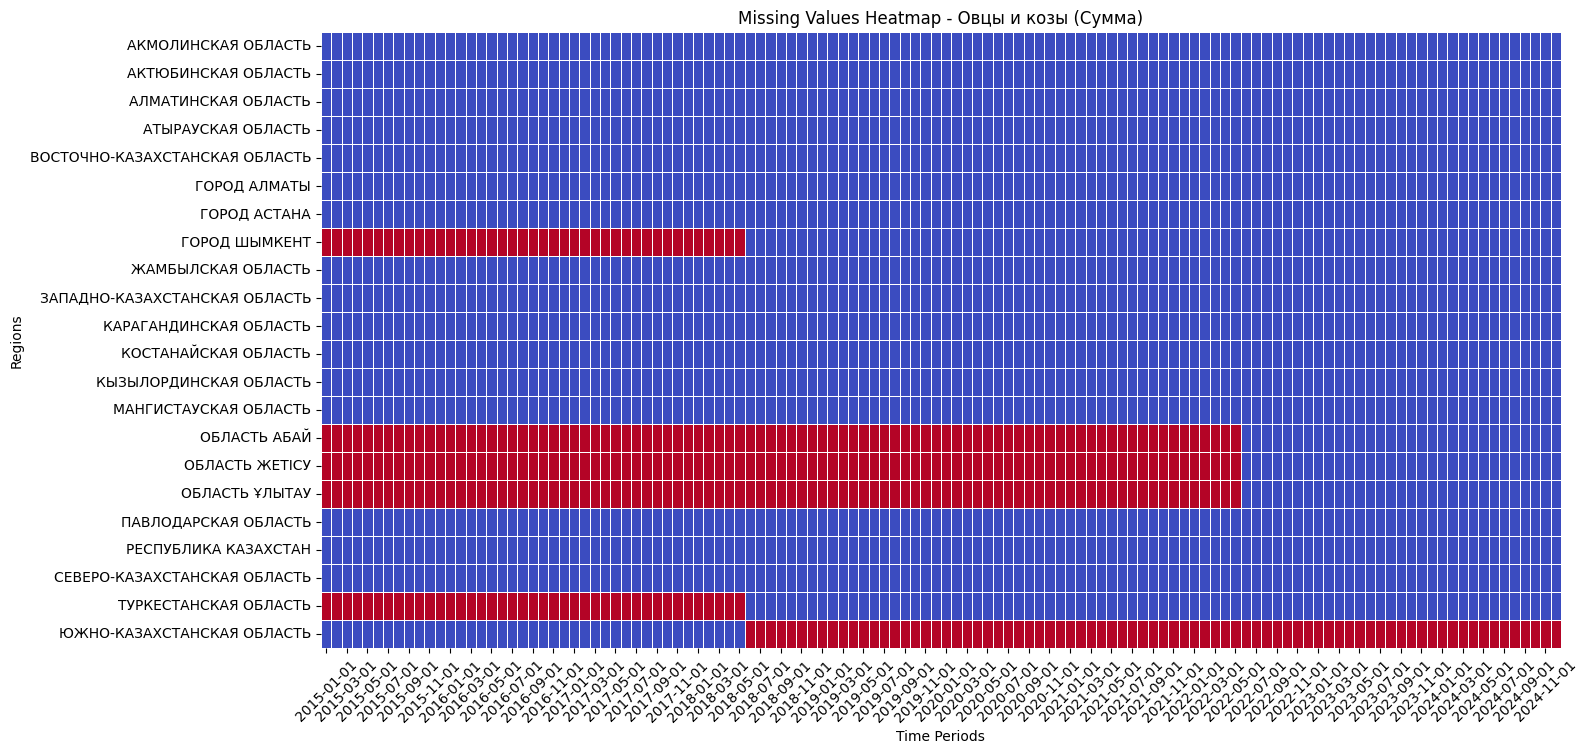

In [13]:
# Replace "нетнетнет" with NaN for easier handling
df_sum.replace("нетнетнет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_sum_numeric = df_sum.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_sum_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Овцы и козы (Сумма)')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [14]:
# Convert from wide format to long format
df_sum_melted = df_sum.melt(id_vars=["Регион"], var_name="Месяц", value_name="Объем")
df_sum_melted.sample(5)

,Регион,Месяц,Объем
563,МАНГИСТАУСКАЯ ОБЛАСТЬ,2017-02-01,238.23
2239,ПАВЛОДАРСКАЯ ОБЛАСТЬ,2023-06-01,1084.78
1557,ПАВЛОДАРСКАЯ ОБЛАСТЬ,2020-11-01,1046.11
2584,КАРАГАНДИНСКАЯ ОБЛАСТЬ,2024-10-01,492.32
491,ГОРОД ШЫМКЕНТ,2016-11-01,NaN


In [15]:
# Convert date column to datetime
df_sum_melted["Месяц"] = pd.to_datetime(df_sum_melted["Месяц"])

# Set index for time-series analysis
df_sum_melted = df_sum_melted.sort_values(["Регион", "Месяц"]).set_index(["Регион", "Месяц"])

df_sum_melted

Объем
Регион                     Месяц             
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01  602.28
                           2015-02-01  636.18
                           2015-03-01  740.73
                           2015-04-01  690.81
                           2015-05-01  869.73
...                                       ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01     NaN
                           2024-09-01     NaN
                           2024-10-01     NaN
                           2024-11-01     NaN
                           2024-12-01     NaN

[2640 rows x 1 columns]

In [16]:
# Replace "нет" with NaN
df_sum_melted = df_sum_melted.replace("нетнетнет", np.nan)
df_sum_melted.isna().groupby("Регион").mean() * 100

,Объем
Регион,
АКМОЛИНСКАЯ ОБЛАСТЬ,0.000000
АКТЮБИНСКАЯ ОБЛАСТЬ,0.000000
АЛМАТИНСКАЯ ОБЛАСТЬ,0.000000
АТЫРАУСКАЯ ОБЛАСТЬ,0.000000
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0.000000
ГОРОД АЛМАТЫ,0.000000
ГОРОД АСТАНА,0.000000
ГОРОД ШЫМКЕНТ,34.166667
ЖАМБЫЛСКАЯ ОБЛАСТЬ,0.000000


In [17]:
# Filter the df
df_shp = df[(df['Показатель'] == "Овцы и козы") & (df['Категория хозяйства'] == "Сельхозпредприятия")]
df_shp = df_shp.drop(columns=["Показатель", "Категория хозяйства"])
df_shp = df_shp.sort_values(by="Регион", ascending=True)

df_shp.sample(5)


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
82,ГОРОД АЛМАТЫ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,ПАВЛОДАРСКАЯ ОБЛАСТЬ,6.17,9.4,11.82,22.32,22.22,6.56,40.12,12.09,12.45,...,6.68,13.18,12.48,16.97,17.79,27.78,12.46,12.61,35.99,24.7
86,ОБЛАСТЬ ҰЛЫТАУ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,0,0,0.81,2.95,0,0,0,0,0,6.66
79,СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,2.1,11.71,2.42,2.48,3.62,4.09,7.69,4.49,5.13,...,26.52,8.16,15.35,26.12,36.29,14.59,20.76,21.07,37.75,24.1
73,КАРАГАНДИНСКАЯ ОБЛАСТЬ,18.76,12.13,12.36,47.86,9.25,52.68,66.6,81.51,161.04,...,25.35,26.23,62.54,33.36,16.87,88.19,106.15,12.92,26.96,33.16


C:\Users\Acer\AppData\Local\Temp\ipykernel_18032\1109300058.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_shp.replace("нет", np.nan, inplace=True)


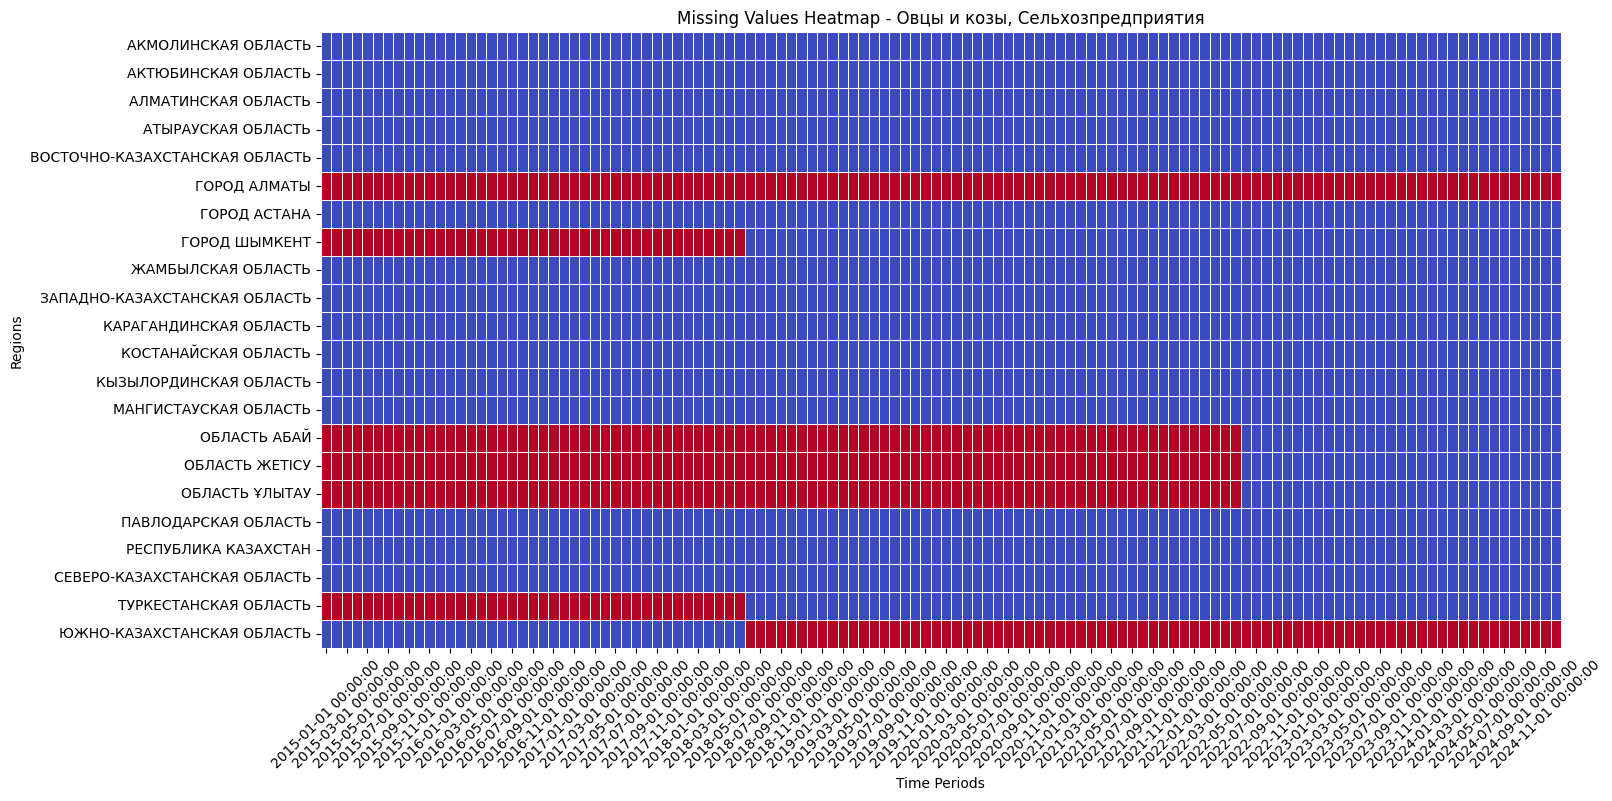

In [18]:
# Replace "нетнетнет" with NaN for easier handling
df_shp.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_shp_numeric = df_shp.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_shp_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Овцы и козы, Сельхозпредприятия')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Filter the df
df_kfh = df[(df['Показатель'] == "Овцы и козы") & (df['Категория хозяйства'] == "Крестьянские или фермерские хозяйства")]
df_kfh = df_kfh.drop(columns=["Показатель", "Категория хозяйства"])
df_kfh = df_kfh.sort_values(by="Регион", ascending=True)

df_kfh.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
104,ГОРОД АЛМАТЫ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,ЖАМБЫЛСКАЯ ОБЛАСТЬ,387.33,583.31,374.16,492.68,660.91,712.43,642.52,367.1,806.2,...,510.5,610.4,951.2,1190.4,869.3,479.3,794.4,1855.3,1870.4,1445.8
106,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,471.4,475.1,369.7,460.2,450.4,409.8,442.3,380,792.4,871.59
99,ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,120.44,146.25,433.24,357.06,343.29,229.85,254.8,209.62,272.45,...,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет
91,АЛМАТИНСКАЯ ОБЛАСТЬ,253.7,109.49,1209.56,249.54,87.64,953.4,317.95,1099.7,1339.16,...,1532,201.5,107.1,1073.8,184.8,1272.8,1136.3,783.9,1869.1,5402.6


C:\Users\Acer\AppData\Local\Temp\ipykernel_18032\652297418.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kfh.replace("нет", np.nan, inplace=True)


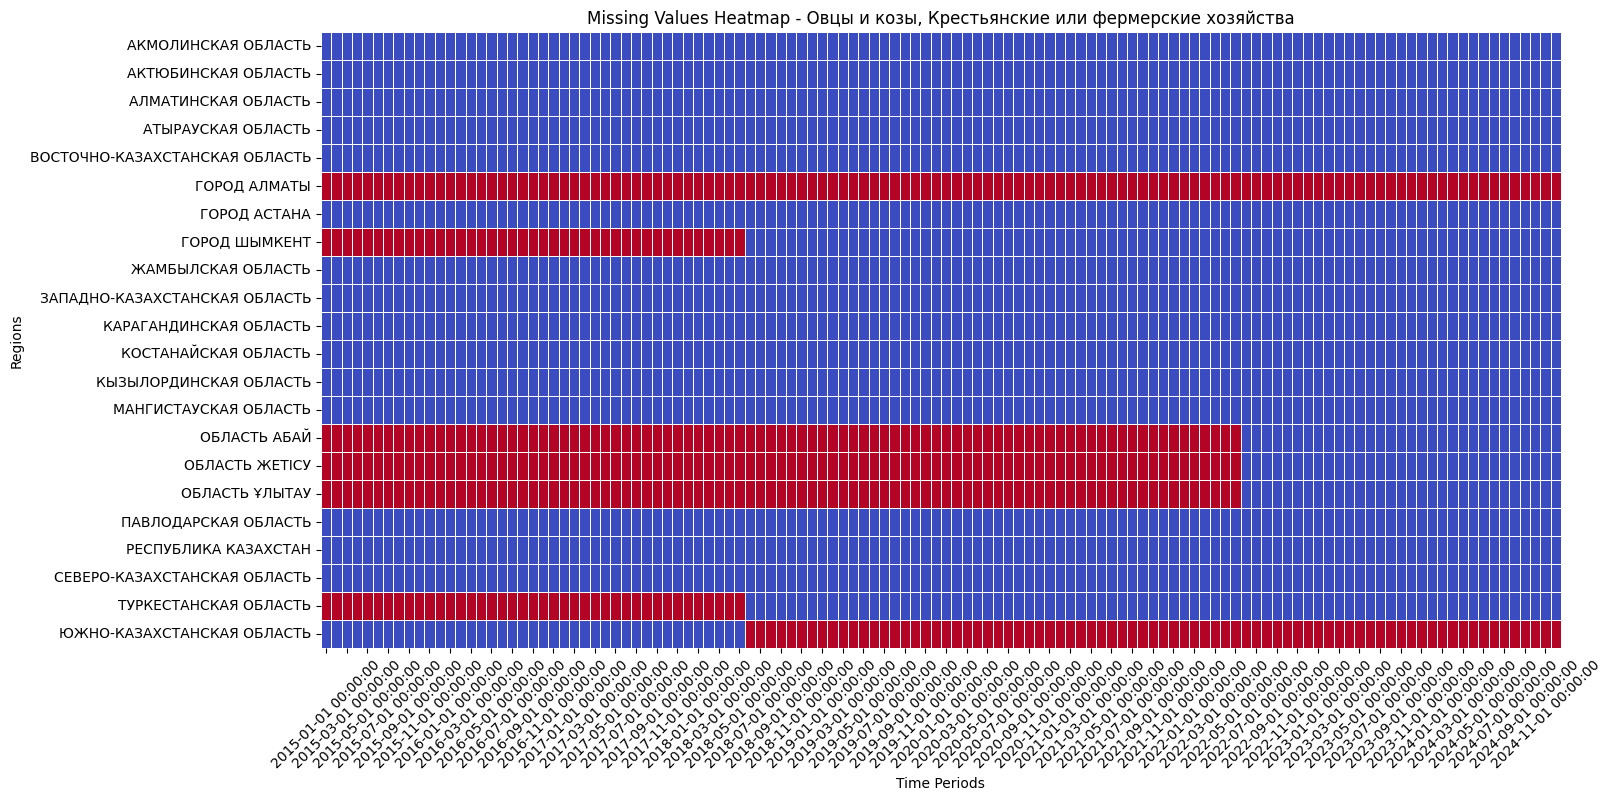

In [20]:
# Replace "нетнетнет" with NaN for easier handling
df_kfh.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_kfh_numeric = df_kfh.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_kfh_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Овцы и козы, Крестьянские или фермерские хозяйства')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [21]:
# Filter the df
df_hn = df[(df['Показатель'] == "Овцы и козы") & (df['Категория хозяйства'] == "Хозяйства населения")]
df_hn = df_hn.drop(columns=["Показатель", "Категория хозяйства"])
df_hn = df_hn.sort_values(by="Регион", ascending=True)

df_hn.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
111,АКМОЛИНСКАЯ ОБЛАСТЬ,537.76,575.22,614.47,609.03,783.18,792.67,519.91,464.94,781.6,...,647.7,602.1,664.2,711.7,394.9,429.2,564.7,580.9,710.1,551
119,КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,533.6,431.79,424.63,387.81,481.6,567.78,697.07,685.49,548.62,...,399.2,460.4,450.6,452.7,300.1,507,473.8,522.2,447.2,478.3
131,ОБЛАСТЬ АБАЙ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,509,638,659.1,1385.8,439.4,550.8,741.9,476.9,601.3,2328.2
118,КОСТАНАЙСКАЯ ОБЛАСТЬ,399.43,174.7,232.27,2095.78,102.18,131.04,211.05,184.44,181.6,...,141.1,1355.6,71,89.9,113.9,100.6,107,107.2,399,367.8
114,АТЫРАУСКАЯ ОБЛАСТЬ,417.3,453.7,877.32,616.29,397.8,1861.57,596.08,931.86,740.5,...,809.2,529.6,383.3,1978,471.3,642.4,541.1,673,436.6,1043.3


C:\Users\Acer\AppData\Local\Temp\ipykernel_18032\913337496.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hn.replace("нет", np.nan, inplace=True)


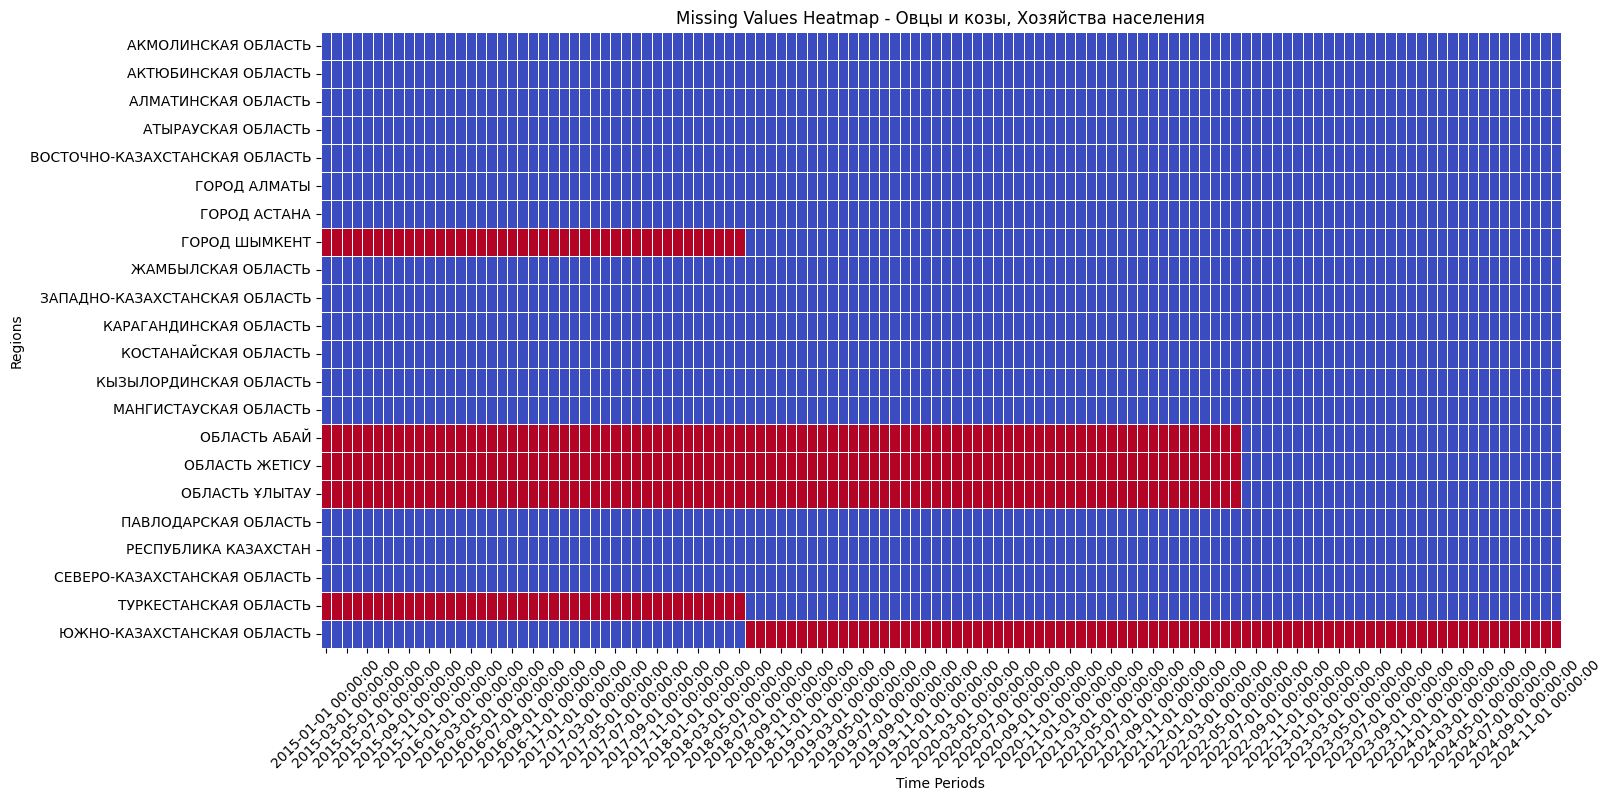

In [22]:
# Replace "нетнетнет" with NaN for easier handling
df_hn.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_hn_numeric = df_hn.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_hn_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Овцы и козы, Хозяйства населения')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [23]:
df_sum_melted

Объем
Регион                     Месяц             
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01  602.28
                           2015-02-01  636.18
                           2015-03-01  740.73
                           2015-04-01  690.81
                           2015-05-01  869.73
...                                       ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01     NaN
                           2024-09-01     NaN
                           2024-10-01     NaN
                           2024-11-01     NaN
                           2024-12-01     NaN

[2640 rows x 1 columns]

In [24]:
# Reset index if needed
df_stats = df_sum_melted.reset_index()

# Calculate basic descriptive stats for each region
region_stats = df_stats.groupby("Регион")["Объем"].agg([
    "count", "min", "max", "mean", "median", "std"
]).rename(columns={
    "count": "Кол-во значений",
    "min": "Мин.",
    "max": "Макс.",
    "mean": "Среднее",
    "median": "Медиана",
    "std": "Ст. откл."
})

# Display result
display(region_stats.sort_values(by="Среднее", ascending=False))


,Кол-во значений,Мин.,Макс.,Среднее,Медиана,Ст. откл.
Регион,,,,,,
РЕСПУБЛИКА КАЗАХСТАН,120,13853.80,61934.42,28058.445750,26252.675,11005.630412
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,41,4889.63,8889.58,5887.619268,5795.290,768.058211
ТУРКЕСТАНСКАЯ ОБЛАСТЬ,79,2350.88,9599.31,5809.238101,5816.440,1215.932165
АЛМАТИНСКАЯ ОБЛАСТЬ,120,470.80,15779.96,4294.072583,3360.725,3333.207385
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,120,451.87,14137.89,3284.480917,2654.795,2598.256100
ЖАМБЫЛСКАЯ ОБЛАСТЬ,120,1811.02,5620.60,3218.859583,2847.065,1098.993130
ОБЛАСТЬ ЖЕТІСУ,31,579.31,7374.26,2445.210000,2683.010,1845.546912
ОБЛАСТЬ АБАЙ,31,590.07,7548.12,2281.481613,1775.880,1628.301427
АКТЮБИНСКАЯ ОБЛАСТЬ,120,523.39,5284.25,2055.195083,1803.185,1040.658822


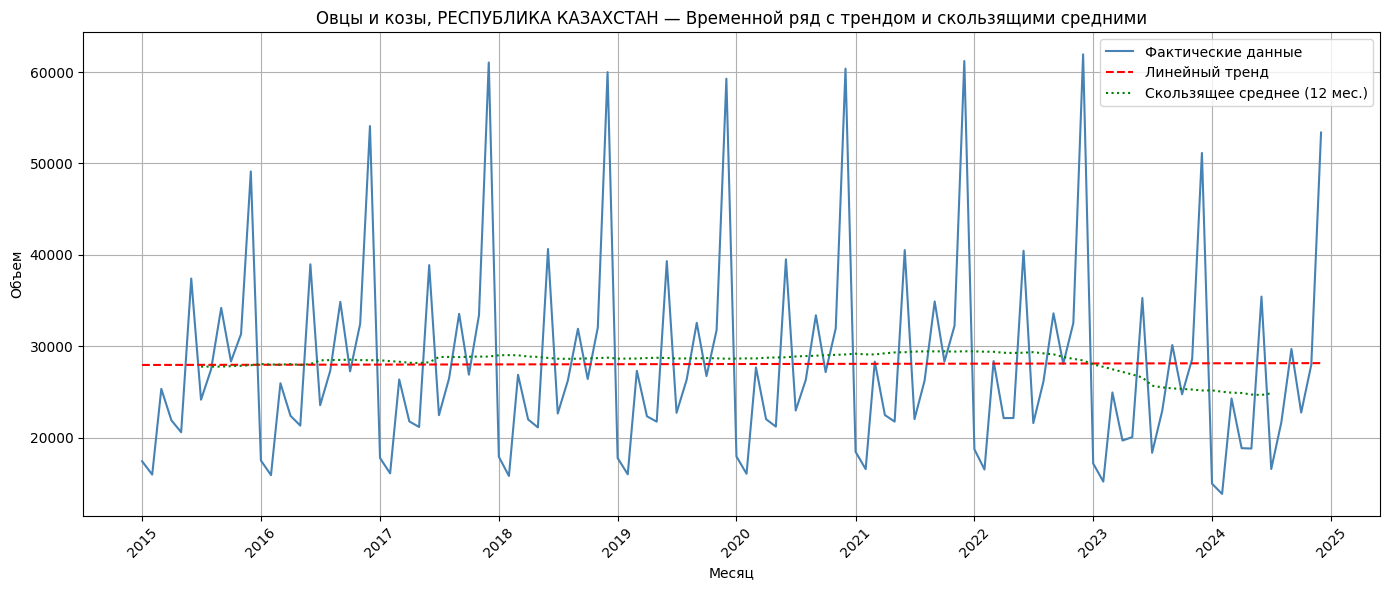

In [25]:
# Filter for national level
national_data = df_stats[df_stats["Регион"] == "РЕСПУБЛИКА КАЗАХСТАН"].copy()

# Ensure 'Месяц' is datetime
national_data["Месяц"] = pd.to_datetime(national_data["Месяц"])

# Create time index as integer (months since start)
national_data = national_data.sort_values("Месяц")
national_data["t"] = range(len(national_data))  # 0, 1, 2, ..., N

# Trend line
coeffs = np.polyfit(national_data["t"], national_data["Объем"], deg=1)
trend = np.poly1d(coeffs)

# Moving Averages
national_data["MA_12"] = national_data["Объем"].rolling(window=12, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))

# Actual data
plt.plot(national_data["Месяц"], national_data["Объем"], label="Фактические данные", color="steelblue")

# Trend line
plt.plot(national_data["Месяц"], trend(national_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# Moving Averages
plt.plot(national_data["Месяц"], national_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# Labels and style
plt.title("Овцы и козы, РЕСПУБЛИКА КАЗАХСТАН — Временной ряд с трендом и скользящими средними")
plt.xlabel("Месяц")
plt.ylabel("Объем")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

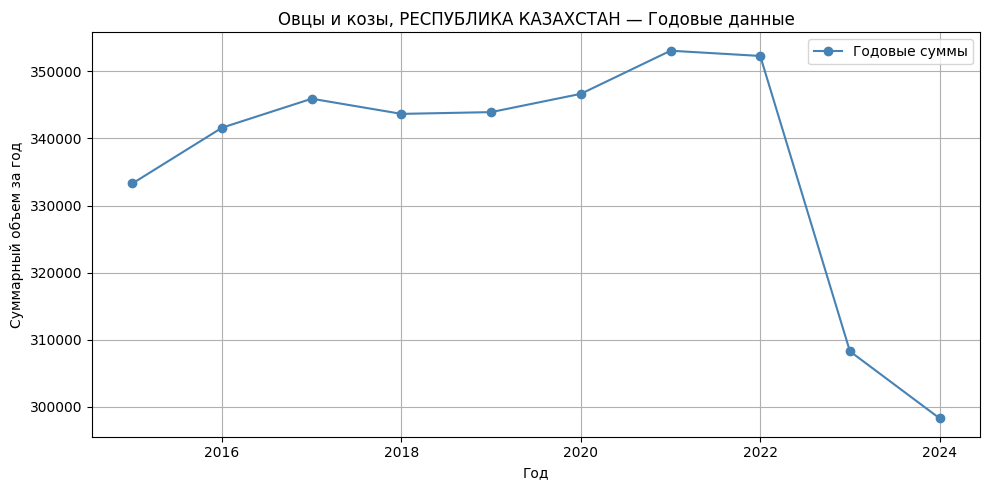

In [27]:
# Aggregate by year (sum)
national_data["Год"] = national_data["Месяц"].dt.year
annual_data = national_data.groupby("Год")["Объем"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))

# Actual yearly data
plt.plot(annual_data["Год"], annual_data["Объем"], marker='o', label="Годовые суммы", color="steelblue")

# Labels and style
plt.title("Овцы и козы, РЕСПУБЛИКА КАЗАХСТАН — Годовые данные")
plt.xlabel("Год")
plt.ylabel("Суммарный объем за год")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


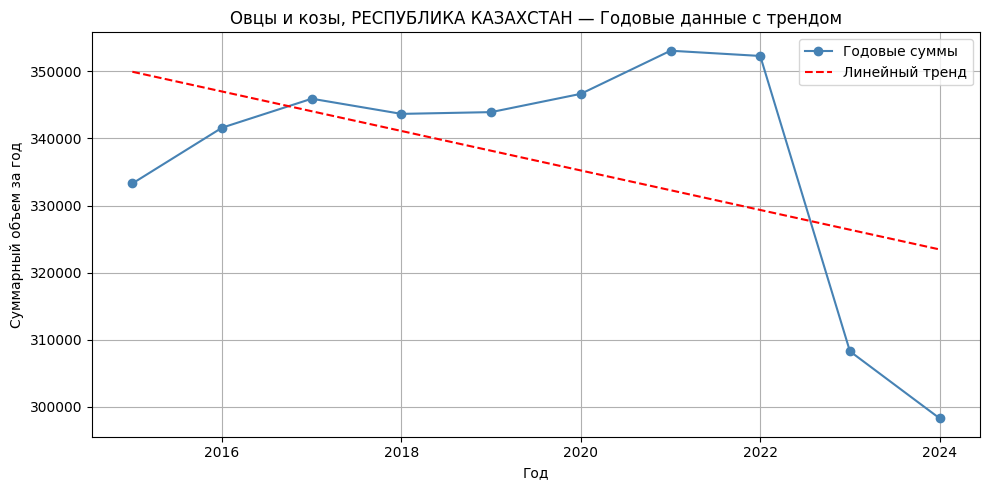

In [ ]:
# # Aggregate by year (sum)
# national_data["Год"] = national_data["Месяц"].dt.year
# annual_data = national_data.groupby("Год")["Объем"].sum().reset_index()

# # Create time index as integer (for trend)
# annual_data["t"] = range(len(annual_data))

# # Fit trend line
# coeffs = np.polyfit(annual_data["t"], annual_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Plot
# plt.figure(figsize=(10, 5))

# # Actual yearly data
# plt.plot(annual_data["Год"], annual_data["Объем"], marker='o', label="Годовые суммы", color="steelblue")

# # Trend line
# plt.plot(annual_data["Год"], trend(annual_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Labels and style
# plt.title("Овцы и козы, РЕСПУБЛИКА КАЗАХСТАН — Годовые данные с трендом")
# plt.xlabel("Год")
# plt.ylabel("Суммарный объем за год")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()


In [29]:
# # Filter for national level
# aktobe_data = df_stats[df_stats["Регион"] == "АКТЮБИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# aktobe_data["Месяц"] = pd.to_datetime(aktobe_data["Месяц"])

# # Create time index as integer (months since start)
# aktobe_data = aktobe_data.sort_values("Месяц")
# aktobe_data["t"] = range(len(aktobe_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(aktobe_data["t"], aktobe_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# aktobe_data["MA_12"] = aktobe_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(aktobe_data["Месяц"], aktobe_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(aktobe_data["Месяц"], trend(aktobe_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(aktobe_data["Месяц"], aktobe_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКТЮБИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [30]:
# # Filter for national level
# akmola_data = df_stats[df_stats["Регион"] == "АКМОЛИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# akmola_data["Месяц"] = pd.to_datetime(akmola_data["Месяц"])

# # Create time index as integer (months since start)
# akmola_data = akmola_data.sort_values("Месяц")
# akmola_data["t"] = range(len(akmola_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(akmola_data["t"], akmola_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# akmola_data["MA_12"] = akmola_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(akmola_data["Месяц"], akmola_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(akmola_data["Месяц"], trend(akmola_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(akmola_data["Месяц"], akmola_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКМОЛИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [31]:
# # Filter for national level
# kyzylorda_data = df_stats[df_stats["Регион"] == "КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# kyzylorda_data["Месяц"] = pd.to_datetime(kyzylorda_data["Месяц"])

# # Create time index as integer (months since start)
# kyzylorda_data = kyzylorda_data.sort_values("Месяц")
# kyzylorda_data["t"] = range(len(kyzylorda_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(kyzylorda_data["t"], kyzylorda_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# kyzylorda_data["MA_12"] = kyzylorda_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(kyzylorda_data["Месяц"], trend(kyzylorda_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()